# 学习曲线

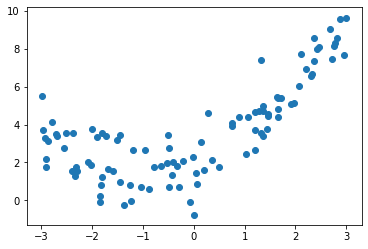

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# 样本数据
np.random.seed(666)
x = np.random.uniform(-3., 3., size = 100)
X = x.reshape(-1, 1)
y = 0.5 * x**2 + x + 2. + np.random.normal(0, 1, size = 100)

plt.scatter(X, y)
plt.show()

In [2]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, random_state = 10)

In [3]:
x_train.shape

(75, 1)

## 学习曲线绘制

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train_score = []
test_score = []


for i in range(1, 76):
    linear_reg = LinearRegression(n_jobs=-1)
    linear_reg.fit(x_train[:i], y_train[:i])
    
    y_train_predict = linear_reg.predict(x_train[:i])
    y_test_predict = linear_reg.predict(x_test)    
    
    train_score.append(mean_squared_error(y_train[:i],y_train_predict))
    test_score.append(mean_squared_error(y_test,y_test_predict))    

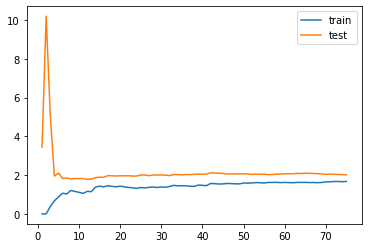

In [5]:
plt.plot([i for i in range(1, 76)], np.sqrt(train_score), label = "train")
plt.plot([i for i in range(1, 76)], np.sqrt(test_score), label = "test")
plt.legend()
plt.show()

In [13]:
def plot_learning_curve(algo, x_rain, x_test, y_train, y_test):
    train_score = []
    test_score = []
    
    for i in range(1, len(x_train)+1):
        algo.fit(x_train[:i], y_train[:i])
        
        y_train_predict = algo.predict(x_train[:i])
        y_test_predict = algo.predict(x_test)    
        
        train_score.append(mean_squared_error(y_train[:i], y_train_predict))
        test_score.append(mean_squared_error(y_test, y_test_predict))
        
    plt.plot([i for i in range(1, len(x_train)+1)], np.sqrt(train_score), label = "train")
    plt.plot([i for i in range(1, len(x_train)+1)], np.sqrt(test_score), label = "test")
    plt.legend()
    plt.axis([0, len(x_train)+1, 0, 4])
    plt.show()

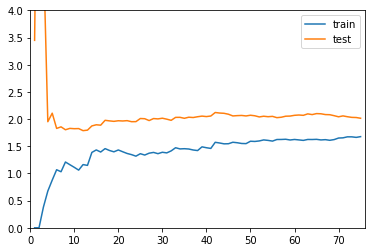

In [14]:
plot_learning_curve(linear_reg, x_train, x_test, y_train, y_test)

## 使用多项式回归

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    ("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression(n_jobs=-1))
])

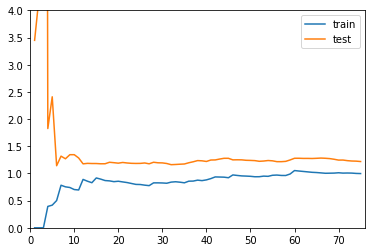

In [16]:
plot_learning_curve(poly_reg, x_train, x_test, y_train, y_test)